In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [43]:
df=pd.read_csv("/content/Churn_Modelling.csv",index_col="RowNumber")


## **Part 1 : Data Preprocessing and Exploration**

In [44]:
# Check out the data
df.head(30)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [45]:
# Find information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [46]:
df.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [47]:
df.nunique()

,0
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2


In [48]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [49]:
df.duplicated().sum()


np.int64(0)

In [50]:
df.drop(columns=['CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Variables like Geography and Gender are categorical which will need encoding.
* Variables like CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary are numerical.
* CustomerId and Surname has no significance in the analysis and can be dropped.


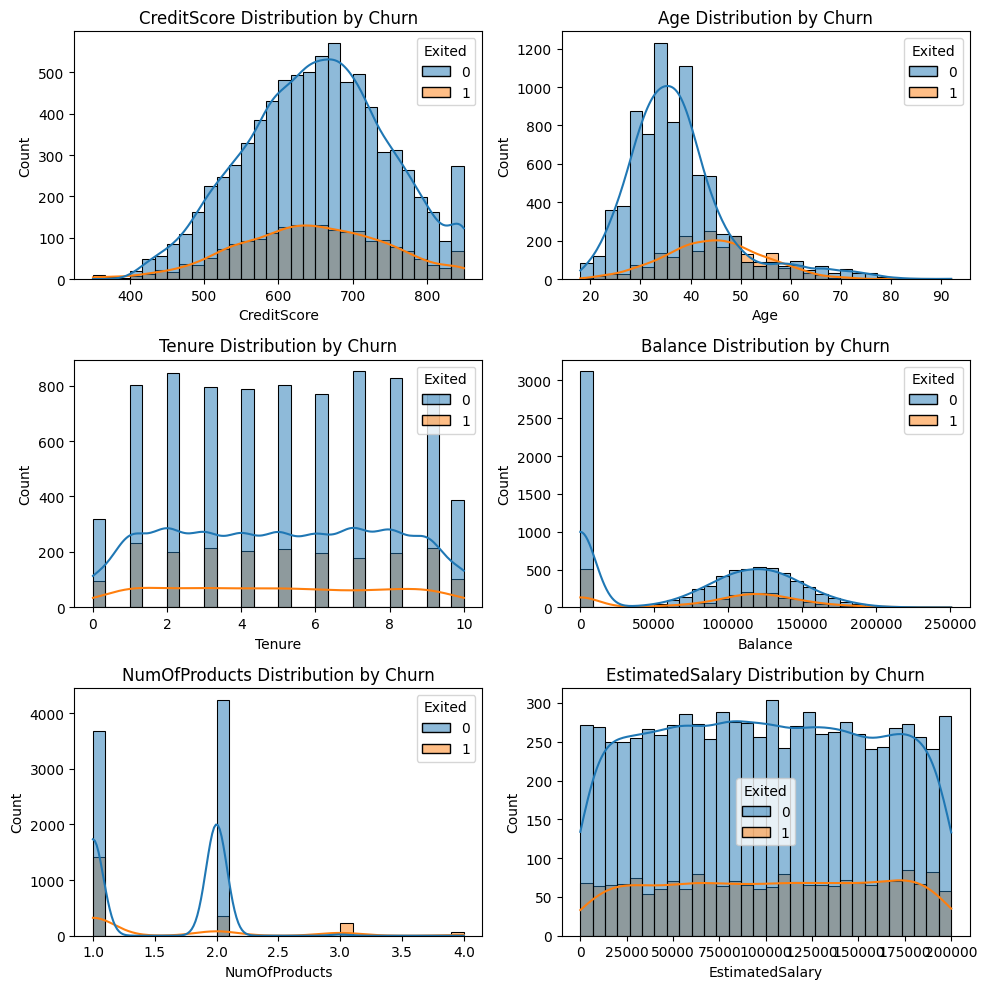

In [51]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot settings
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, hue='Exited', kde=True, bins=30)
    plt.title(f"{col} Distribution by Churn")
plt.tight_layout()
plt.show()

* Credit score is the same with exited and not.
* Most of our age range is between 20-40 and they mostly stay but exiting is common above 50
* Tenure Data is almost split evenly across all years except 0 and 10.
* Very low Balance accounts seem to stay with the bank which is not the case for 100-150k customers
* Customers with 1 or 3 or 4 products have high exiting chane with only two products being low.
* Salary is distributed evenly which shows no relation to exiting

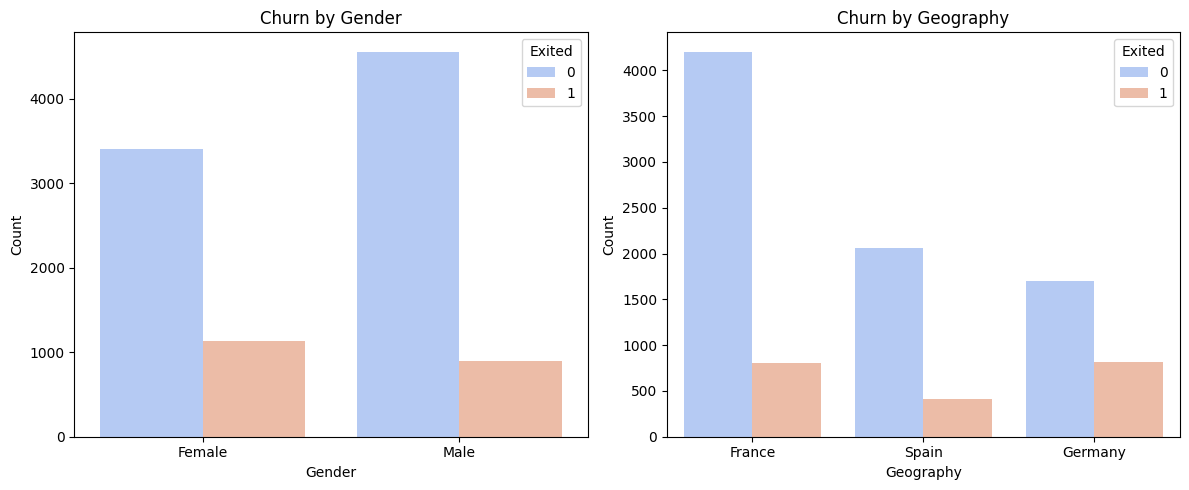

In [52]:
# Set figure size
plt.figure(figsize=(12, 5))

# List of categorical columns to plot
cat_cols = ['Gender', 'Geography']

# Loop through and plot
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(data=df, x=col, hue='Exited', palette='coolwarm')
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

* Exiting rate is Higher for females even though they are less than males
* Germany also has the highest exit rates even though it has fewest customers.(Germany might have problems with customer service.)


In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True,dtype=bool)

* Pre-Processed Categorical variables using the proper techniques so they can be used in modelling

In [54]:
print(df.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [55]:
# Age group: bin ages into categories ,(Young,Adult,Senior)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 22, 50, 100], labels=['0', '1', '2'])

# Balance to Salary Ratio
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Zero Balance Flag
df['ZeroBalanceFlag'] = (df['Balance'] == 0).astype(int)

# High Balance Flag (over 100k)
df['HighBalanceFlag'] = (df['Balance'] > 100000).astype(int)

# High Credit Score Flag (over 700)
df['HighCreditScoreFlag'] = (df['CreditScore'] > 700).astype(int)


* Applied feature engineering to create more features for the models

In [56]:
df.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,AgeGroup,BalanceSalaryRatio,ZeroBalanceFlag,HighBalanceFlag,HighCreditScoreFlag
RowNumber,,,,,,,,,,,,,,,,,
1,619,0,42,2,0.0,1,1,1,101348.88,1,False,False,1,0.0,1,0,0


In [57]:
df.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [58]:
from sklearn.model_selection import train_test_split
X=df.drop('Exited',axis=1)
y=df['Exited']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Second split: 75% of temp (60% of total) for train, 25% of temp (20% of total) for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [59]:
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Training set: 6000 samples (60.0%)
Validation set: 2000 samples (20.0%)
Test set: 2000 samples (20.0%)


* Data has been split to train,validation,test with 60/20/20

### **Showing Target imbalance:**

<ipython-input-60-9d01c1ce2650>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='Set2')


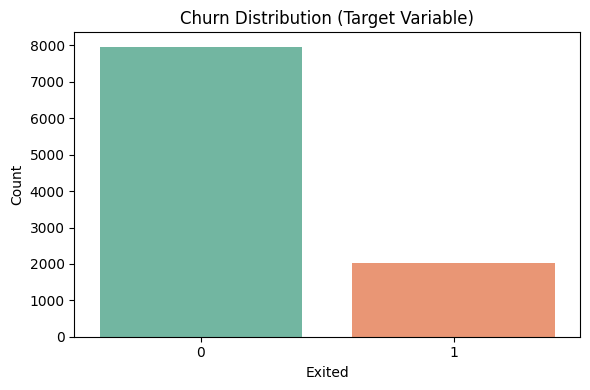

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited', palette='Set2')
# Add labels
plt.title('Churn Distribution (Target Variable)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

* Target variable has an 80/20 % imbalance with most of the customers staying in the bank.

Resampled training exited distribution: Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


<ipython-input-61-f53b0f4d5684>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame({'Exited': y_train}), x='Exited', palette='Set2')


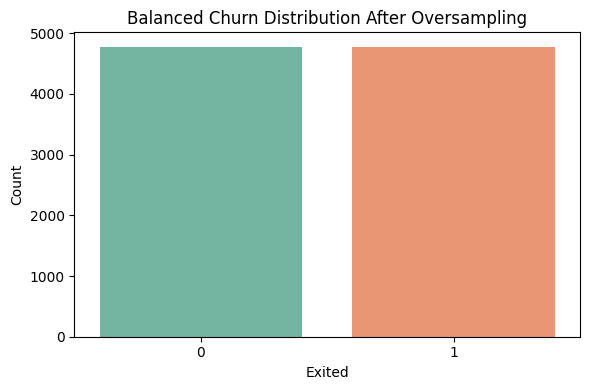

In [61]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling to training set
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
print("Resampled training exited distribution:", pd.Series(y_train).value_counts(normalize=True))

# Plot the balanced distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=pd.DataFrame({'Exited': y_train}), x='Exited', palette='Set2')
plt.title('Balanced Churn Distribution After Oversampling')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Part 2 : Baseline Model

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(Cs=10,cv=5,penalty='l2',scoring='accuracy',random_state=42)
model.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=42, scoring='accuracy')

In [64]:
y_pred=model.predict(X_val)
print("Validation Accuracy:",accuracy_score(y_val,y_pred))
print("Validation precision:",precision_score(y_val,y_pred))
print("Validation Recall:",recall_score(y_val,y_pred))
print("Validation F1 Score",f1_score(y_val,y_pred))
print("Validation roc_auc_score:",roc_auc_score(y_val,y_pred))

Validation Accuracy: 0.713
Validation precision: 0.38450899031811897
Validation Recall: 0.683046683046683
Validation F1 Score 0.4920353982300885
Validation roc_auc_score: 0.7018497696463797


* Overall model performance can be improved

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Run random search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=15,
    cv=10,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42  # For reproducibility
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Train a new model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=200,
                       random_state=42)

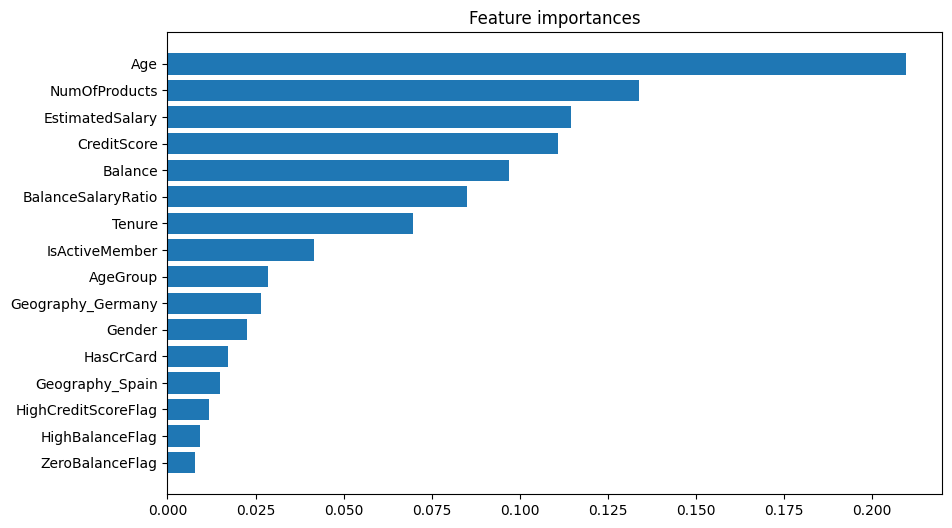

In [66]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]  # Use X_train.columns for feature names

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names)
plt.gca().invert_yaxis()  # So the most important is at the top
plt.show()

In [67]:
y_pred=best_rf.predict(X_val)
print("Validation Accuracy:",accuracy_score(y_val,y_pred))
print("Validation precision:",precision_score(y_val,y_pred))
print("Validation Recall:",recall_score(y_val,y_pred))
print("Validation F1 Score",f1_score(y_val,y_pred))
print("Validation roc_auc_score:",roc_auc_score(y_val,y_pred))

Validation Accuracy: 0.856
Validation precision: 0.6900958466453674
Validation Recall: 0.5307125307125307
Validation F1 Score 0.6
Validation roc_auc_score: 0.73491056541904


* Model performs noticeably better than Logistic Regression, With Age being the most important feature.


# Part 3 : Neural Network Design and implementation

In [68]:
import torch
from torch import nn

In [69]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## First step will be to change data to tensors in order to be able to use neural networks


In [70]:
X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32)).type(torch.float).to(device)
y_train_tensor = torch.from_numpy(y_train.values.astype(np.float32)).type(torch.float).to(device)
X_val_tensor = torch.from_numpy(X_val.values.astype(np.float32)).type(torch.float).to(device)
y_val_tensor = torch.from_numpy(y_val.values.astype(np.float32)).type(torch.float).to(device)
X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32)).type(torch.float).to(device)
y_test_tensor = torch.from_numpy(y_test.values.astype(np.float32)).type(torch.float).to(device)

In [71]:
X_train_tensor

tensor([[-0.6563, -1.0131,  0.2786,  ..., -0.6729, -1.0485, -0.6652],
        [-1.9867, -1.0131, -0.2894,  ..., -0.6729,  0.9538, -0.6652],
        [ 1.5677,  0.9871,  0.1839,  ...,  1.4860, -1.0485,  1.5032],
        ...,
        [ 1.3442, -1.0131, -1.3306,  ..., -0.6729,  0.9538,  1.5032],
        [-0.3111, -1.0131,  0.0893,  ...,  1.4860, -1.0485, -0.6652],
        [-0.1892, -1.0131, -0.1947,  ..., -0.6729,  0.9538, -0.6652]],
       device='cuda:0')

In [72]:
import torch
from torch.utils.data import DataLoader, TensorDataset


# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Adjust batch_size as needed

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False) # Adjust batch_size as needed


### Create neural network with the following structure:
  * 3 Hidden layers
  * Relu Activation Function
  * 50% Drop out after each layer
  * Sigmoid function at the end for decision making

In [73]:
class TabularNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 32)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = self.dropout1(self.act1(self.fc1(x)))
        x = self.dropout2(self.act2(self.fc2(x)))
        x = self.fc3(x)  # No sigmoid here!
        return x


In [74]:
model = TabularNet(X_train_tensor.shape[1]).to(device)

### Calculate class weights to use in loss functions to balance the imbalance in the data with giving more weight to weak classes

In [75]:
# Compute class weights for custom loss
#class_counts = np.bincount(y_train.astype(int))
#class_weights = torch.tensor([class_counts[1]/class_counts[0], 1.0], dtype=torch.float32).to(device)
num_pos = np.sum(y_train == 1)
num_neg = np.sum(y_train == 0)
pos_weight = torch.tensor(num_neg / num_pos, dtype=torch.float32).to(device)

#### Creating the model with custom loss function and optimizer with callbacks

In [76]:
# Custom weighted loss (for binary classification)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 25
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses, val_losses = [], []

In [77]:
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_running_loss += loss.item() * X_batch.size(0)
    val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    # Early stopping check (looser)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    # Print every 2 epochs
    if epoch % 2 == 0:
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

Epoch 1: Train Loss=0.6392, Val Loss=0.5717
Epoch 3: Train Loss=0.5668, Val Loss=0.5402
Epoch 5: Train Loss=0.5350, Val Loss=0.5298
Epoch 7: Train Loss=0.5085, Val Loss=0.5019
Epoch 9: Train Loss=0.4902, Val Loss=0.4730
Epoch 11: Train Loss=0.4801, Val Loss=0.4733
Epoch 13: Train Loss=0.4760, Val Loss=0.4459
Epoch 15: Train Loss=0.4736, Val Loss=0.4705
Epoch 17: Train Loss=0.4703, Val Loss=0.4593
Epoch 19: Train Loss=0.4686, Val Loss=0.4690
Epoch 21: Train Loss=0.4591, Val Loss=0.4581
Epoch 23: Train Loss=0.4597, Val Loss=0.4580
Epoch 25: Train Loss=0.4572, Val Loss=0.4511
Epoch 27: Train Loss=0.4547, Val Loss=0.4604
Epoch 29: Train Loss=0.4518, Val Loss=0.4662
Epoch 31: Train Loss=0.4546, Val Loss=0.4580
Epoch 33: Train Loss=0.4512, Val Loss=0.4626
Epoch 35: Train Loss=0.4460, Val Loss=0.4479
Epoch 37: Train Loss=0.4473, Val Loss=0.4445
Epoch 39: Train Loss=0.4461, Val Loss=0.4601
Epoch 41: Train Loss=0.4483, Val Loss=0.4646
Epoch 43: Train Loss=0.4493, Val Loss=0.4539
Epoch 45: Train

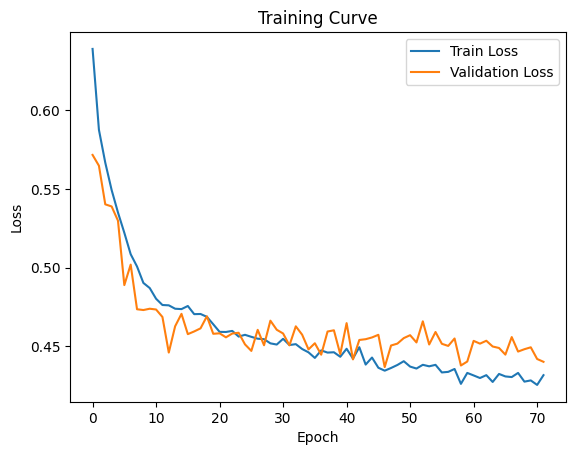

In [78]:
# Visualize training and loss curves curve
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

* Model has limited performance due to the small architecture with the current dataset and I will implement raytuner in order to improve performance


#Part 4 Model Evaluation and HyperParameter Tuning using Raytune

> Hyperparameter Tuning with Ray Tune
>
> We will use Ray Tune to search for the best hyperparameters for our neural network.
> The parameters to tune are:
> - Learning rate
> - Batch size
> - Number of neurons in each layer
> - Dropout rate
> - Weight decay (L2 regularization)
>
> Ray Tune will train several models with different combinations and report the best one.

In [79]:
!pip install ray

In [82]:
import ray
from ray import tune
from ray import train  # Added for ray.train.report
from ray.tune.schedulers import ASHAScheduler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch

# Subset the data to speed up tuning - using a very small subset
subset_frac = 0.8  # Reduced subset size drastically
train_subset_size = int(len(X_train_tensor) * subset_frac)
val_subset_size = int(len(X_val_tensor) * subset_frac)

X_train_tune = X_train_tensor[:train_subset_size]
y_train_tune = y_train_tensor[:train_subset_size]
X_val_tune = X_val_tensor[:val_subset_size]
y_val_tune = y_val_tensor[:val_subset_size]

# Define the training function for Ray Tune
def train_tune(config):
    class TunedNet(nn.Module):
        def __init__(self, input_dim, hidden1, hidden2, dropout):
            super().__init__()
            self.fc1 = nn.Linear(input_dim, hidden1)
            self.fc2 = nn.Linear(hidden1, hidden2)
            self.fc3 = nn.Linear(hidden2, 1)
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = self.dropout(x)
            x = torch.relu(self.fc2(x))
            x = self.dropout(x)
            x = self.fc3(x)
            return x

    model = TunedNet(
        input_dim=X_train_tune.shape[1],
        hidden1=config["hidden1"],
        hidden2=config["hidden2"],
        dropout=config["dropout"]
    ).to(device)

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=config["lr"],
        weight_decay=config["weight_decay"]
    )

    train_loader = DataLoader(
        TensorDataset(X_train_tune, y_train_tune),
        batch_size=config["batch_size"],
        shuffle=True
    )
    val_loader = DataLoader(
        TensorDataset(X_val_tune, y_val_tune),
        batch_size=256,  # Using a larger batch size for faster validation with limited data
        shuffle=False
    )

    best_acc = 0
    patience = 2  # Reduced patience for faster tuning
    epochs_no_improve = 0

    for epoch in range(2):  # Very few epochs for initial testing
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            out = model(xb).squeeze()
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                out = model(xb).squeeze()
                preds = torch.sigmoid(out) > 0.5
                correct += (preds.cpu() == yb.cpu()).sum().item()
                total += yb.size(0)
        val_acc = correct / total
        ray.train.report({"mean_accuracy": val_acc})  # Report accuracy to Ray Tune

        if val_acc > best_acc:
            best_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            break

# Define the search space - reduced to fewer options
search_space = {
    "lr": tune.loguniform(1e-4, 1e-2),
    "batch_size": tune.choice([32]),  # Only one batch size option
    "hidden1": tune.choice([32]),  # Only one hidden layer size option
    "hidden2": tune.choice([16]),  # Only one hidden layer size option
    "dropout": tune.uniform(0.2, 0.6),
    "weight_decay": tune.loguniform(1e-5, 1e-2)
}

# Initialize Ray if not already initialized
if not ray.is_initialized():
    ray.init(num_cpus=1, num_gpus=int(device == "cuda"))  # Limit resources

# Run Ray Tune - reduced num_samples and epochs
analysis = tune.run(
    train_tune,
    config=search_space,
    num_samples=25,  # Very few samples
    scheduler=ASHAScheduler(metric="mean_accuracy", mode="max"),
    resources_per_trial={"cpu": 1, "gpu": int(device == "cuda")},
    stop={"training_iteration": 5}  # Stop after 2 epochs
)
print("Best config: ", analysis.get_best_config(metric="mean_accuracy", mode="max"))

2025-04-24 01:34:31,535	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+-------------------------------------------------------------------+
| Configuration for experiment     train_tune_2025-04-24_01-34-31   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        AsyncHyperBandScheduler          |
| Number of trials                 25                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_tune_2025-04-24_01-34-31

Trial status: 25 PENDING
Current time: 2025-04-24 01:34:33. Total running time: 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------+
| Trial name               status              lr     batch_size     hidden1     hidden2     dropout     weight_decay |
+------------------------------

2025-04-24 01:38:02,167	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_tune_2025-04-24_01-34-31' in 0.0136s.



Trial train_tune_452a4_00024 finished iteration 1 at 2025-04-24 01:38:02. Total running time: 3min 30s
+-------------------------------------------------+
| Trial train_tune_452a4_00024 result             |
+-------------------------------------------------+
| checkpoint_dir_name                             |
| time_this_iter_s                        2.40254 |
| time_total_s                            2.40254 |
| training_iteration                            1 |
| mean_accuracy                           0.79063 |
+-------------------------------------------------+

Trial train_tune_452a4_00024 completed after 1 iterations at 2025-04-24 01:38:02. Total running time: 3min 30s

Trial status: 25 TERMINATED
Current time: 2025-04-24 01:38:02. Total running time: 3min 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------

### Evaluating the best model :

In [86]:
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score  # Added for accuracy_score
import torch

class TunedNet(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, dropout):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Get best config
best_config = analysis.get_best_config(metric="mean_accuracy", mode="max")

# Train final model on train+val with best config
final_model = TunedNet(
    input_dim=X_train_tensor.shape[1],
    hidden1=best_config["hidden1"],
    hidden2=best_config["hidden2"],
    dropout=best_config["dropout"]
).to(device)

optimizer = torch.optim.Adam(
    final_model.parameters(),
    lr=best_config["lr"],
    weight_decay=best_config["weight_decay"]
)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Combine train and val for final training
X_final = torch.cat([X_train_tensor, X_val_tensor])
y_final = torch.cat([y_train_tensor, y_val_tensor])
final_loader = DataLoader(TensorDataset(X_final, y_final), batch_size=best_config["batch_size"], shuffle=True)

for epoch in range(100):
    final_model.train()
    for xb, yb in final_loader:
        optimizer.zero_grad()
        out = final_model(xb).squeeze()
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

# Test evaluation
final_model.eval()
with torch.no_grad():
    nn_test_logits = final_model(X_test_tensor).squeeze()
    nn_test_probs = torch.sigmoid(nn_test_logits).cpu().numpy()
    nn_test_preds = (nn_test_probs > 0.5).astype(int)


### Comparison with baseline model best_rf:

In [89]:
# Already trained: best_rf
rf_test_preds = best_rf.predict(X_test)
rf_test_probs = best_rf.predict_proba(X_test)[:, 1]
rf_test_acc = accuracy_score(y_test, rf_test_preds)
print("Random Forest Test Accuracy:", rf_test_acc)

Random Forest Test Accuracy: 0.8555


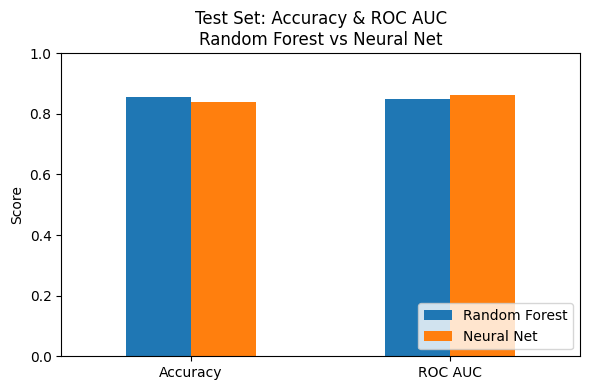

In [90]:
# Calculate metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_test, rf_test_preds),
        accuracy_score(y_test_tensor.cpu().numpy(), nn_test_preds)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, rf_test_probs),
        roc_auc_score(y_test_tensor.cpu().numpy(), nn_test_probs)
    ]
}
df = pd.DataFrame(metrics, index=["Random Forest", "Neural Net"]).T
# Bar plot
df.plot(kind="bar", figsize=(6, 4))
plt.title("Test Set: Accuracy & ROC AUC\nRandom Forest vs Neural Net")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()